# MDA Graphs using dz_lib and Pyodide

In [ ]:
%pip install dz_lib
from dz_lib.utils import data
from dz_lib.univariate import mda, distributions
from dz_lib.univariate.data import Sample

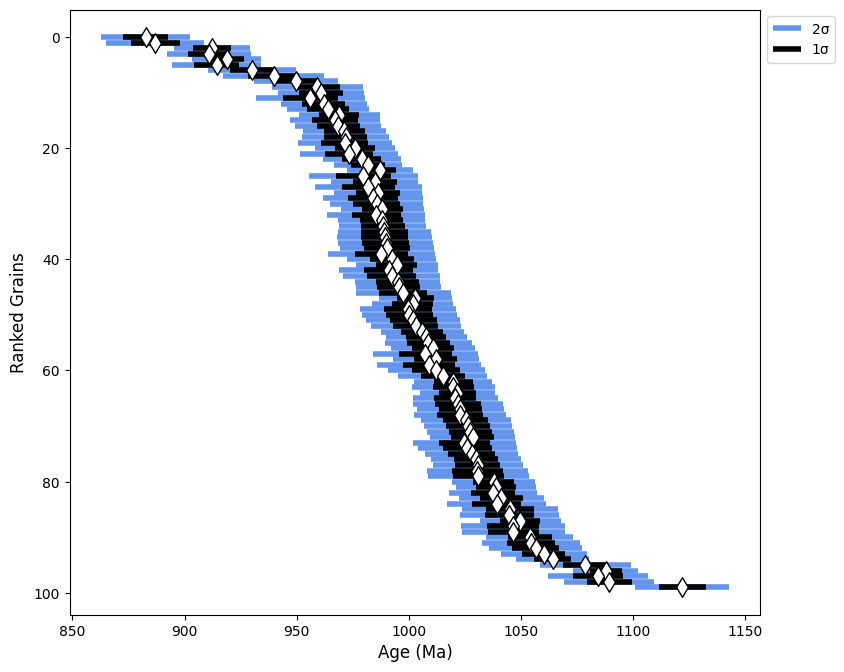

In [9]:
samples_array = data.excel_to_array("data/Simple_example.xlsx")
samples = data.read_1d_samples(samples_array)
grains = samples[3].grains
new_grains = []
for grain in grains:
    if 700 < grain.age < 1200:
        new_grains.append(grain)
graph = mda.ranked_ages_plot(new_grains)
graph

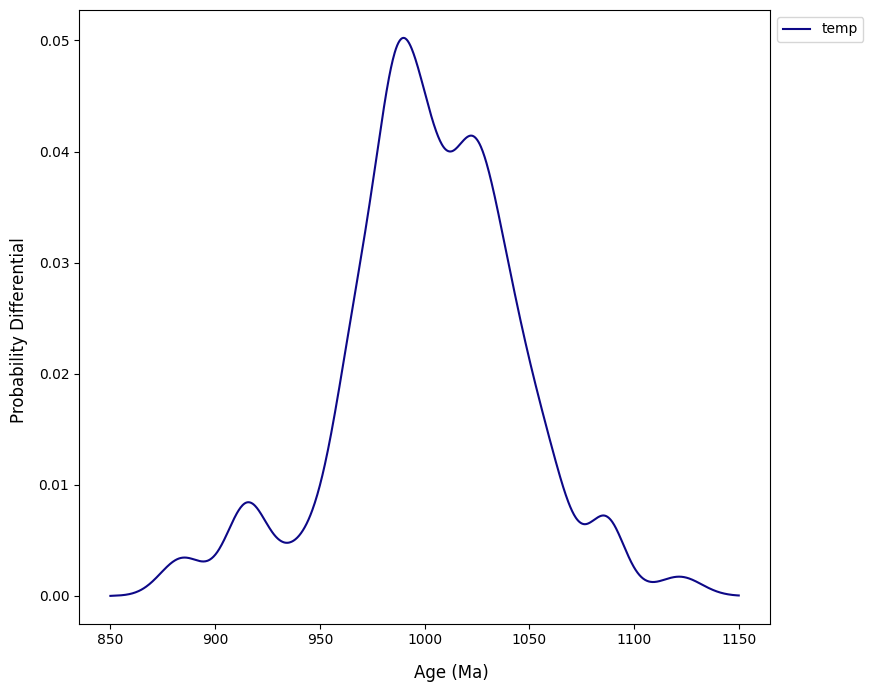

In [10]:
new_sample = Sample("temp", new_grains)
distro = distributions.pdp_function(new_sample)
distro = distro.subset(x_min=850, x_max=1150)
distro_graph = distributions.distribution_graph([distro])
distro_graph

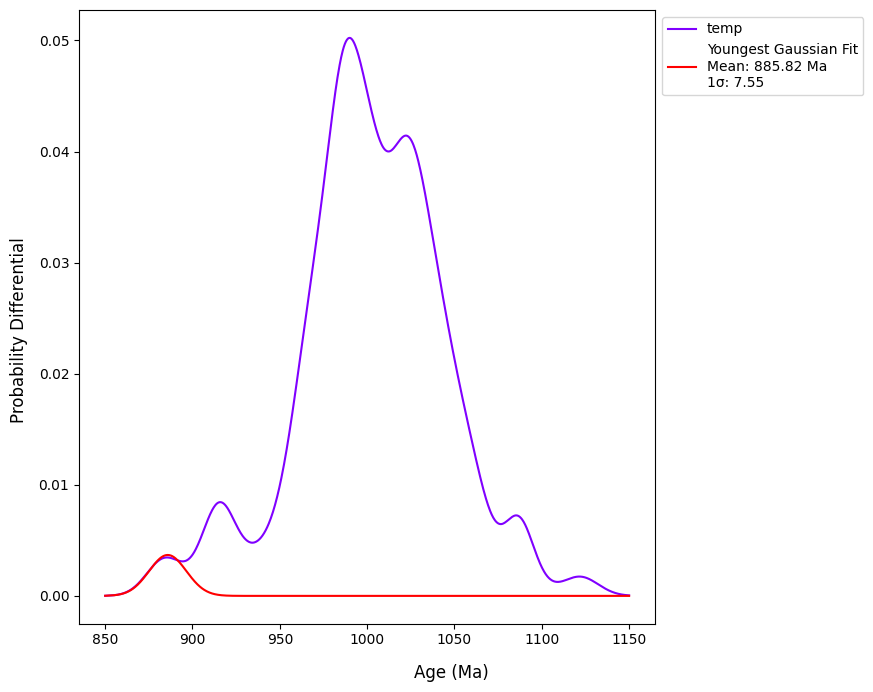

In [11]:
fitted_grain, fitted_distro = mda.youngest_gaussian_fit(new_sample.grains)
fitted_distro = fitted_distro.subset(x_min=850, x_max=1150)
graph = distributions.distribution_graph([distro, fitted_distro], color_map="rainbow")
graph

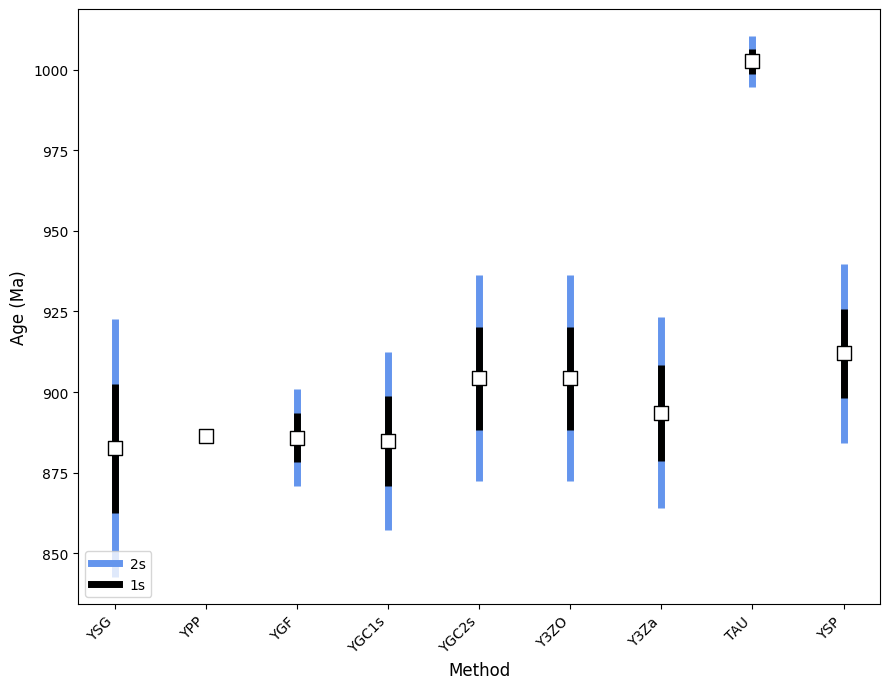

In [12]:
comparison_graph = mda.comparison_graph(new_sample.grains)
comparison_graph